<a href="https://colab.research.google.com/github/TasneemBadry/TasneemBadry/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries for load data and classifiers
import pandas as pd                                         #pandas for load Data
import numpy as np
from sklearn.tree import DecisionTreeClassifier             #library for DT classifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm                                     # for SVM
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB                  #for Naive Bayes

Load the train data by pandas

In [ ]:
f=pd.read_csv('/content/drive/MyDrive/Data Mining/comp.2/train_new.csv')
f

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


I use info() function to make sure about data, its number of rows, columns and entries, and know the type of all data(int , string...)

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

now we want to know the nanvalues in all data by function isnull() and sum it in each column by function sum()


In [ ]:
f.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

after we determine the nanvalues, there are columns have a big number of nanvalues so these columns not affect in data so we drop it.
"merchant_id" this column has a data mix between int and string (object) and not affect in data so we drop it also.

In [ ]:
f=f.drop(columns=['has_urgency_banner','merchant_profile_picture','merchant_id','urgency_text','product_color'])

now we put "rating" column with "id" column at the end by reorder and pop column.

In [ ]:
reorder_column = f.pop('rating')
f.insert(len(f. columns), 'rating', reorder_column)

I want to fill the little nanvalues in the other columns, the columns'data not contain the same data type, some columns have integer data or some have string data or the others have object data (int with str) so I used forwared fill to fill each column by its data type (int or str or object).

In [ ]:
f.fillna(method='ffill')

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month,id,rating
0,8.00,7,EUR,10000,1,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",M,50,Livraison standard,3,0,30,50,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,1,summer,2020-08,272,4.0
1,8.00,7,EUR,1000,0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",L,50,Livraison standard,3,0,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,0,summer,2020-08,1515,4.0
2,6.00,34,EUR,100,0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",L,50,Livraison standard,2,0,41,50,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,0,summer,2020-08,940,4.0
3,4.67,4,EUR,100,1,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",XS,5,Livraison standard,1,0,25,50,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,0,summer,2020-08,309,3.0
4,8.00,11,EUR,1000,0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",S,50,Livraison standard,3,0,15,50,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,0,summer,2020-08,226,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",S,50,Livraison standard,1,0,41,50,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,0,summer,2020-08,1381,4.0
1090,5.00,5,EUR,1000,0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",H01,31,Livraison standard,2,0,35,50,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,0,summer,2020-08,212,5.0
1091,9.00,48,EUR,1000,1,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",M,50,Livraison standard,3,0,25,50,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,0,summer,2020-08,163,4.0
1092,11.00,10,EUR,10000,1,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",M,50,Livraison standard,2,0,45,50,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,0,summer,2020-08,674,4.0


before prediction we need to make categories from the data, I used Label Encoding to convert string data or object data to categories by putting all columns which have str or object in LabelEncoder() .
this step is kind of preprocessing for data to facilitate the prediction.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
f [['currency_buyer', 'tags','product_variation_size_id','shipping_option_name','origin_country','merchant_title','merchant_name','merchant_info_subtitle','theme','crawl_month']]= f[['currency_buyer', 'tags','product_variation_size_id','shipping_option_name','origin_country','merchant_title','merchant_name','merchant_info_subtitle','theme','crawl_month']].apply(le.fit_transform)


now we need to divide data to X(input) and Y(output).

In [ ]:
X=f.iloc[:,:-1]
Y=f.iloc[:,-1]

and splitting X, Y to train data (X_train,y_train) and test data (X_test,y_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)

**Decidion Tree classifier start**
and the first Hyperparameter tunning by Max_depth and Min_samples_leaf.

In [ ]:
dectree = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=5)
dectree.fit(X_train,y_train)
pred = dectree.predict(X_test)

In [ ]:
#let us tune our hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3]
}
dtree_search = GridSearchCV(dectree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=5)
dtree_search.fit(X_train , y_train)

paralist = []
paralist = list(dtree_search.best_params_.values())

dectree = DecisionTreeClassifier(criterion = "entropy", max_depth= paralist[0], max_features =paralist[1], random_state=3)
dectree.fit(X_train, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=6,
                       random_state=3)

In [ ]:
# finally the prediction of X_test
pred = dectree.predict(X_test)

Load the Test Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Mining/comp.2/test_new.csv')
df

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,NaN,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,NaN,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,3,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


know the data type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

and sum the number of nanvalues in each column

In [ ]:
df.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

drop all columns which have a big number of nanvalues with "merchant_id" column

In [ ]:
df=df.drop(columns=['has_urgency_banner','merchant_profile_picture','merchant_id','urgency_text','product_color'])

fill the other columns by forward fill to fill each column by its data type (int or str or object).

In [ ]:
df.fillna(method='ffill')

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",XS,5,Livraison standard,2,0,139,50,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,0,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",XS,50,Livraison standard,2,0,31,50,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,0,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",XS,20,Livraison standard,2,0,41,50,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,0,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",M,50,Livraison standard,5,0,42,50,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,0,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",M,50,Livraison standard,3,0,38,50,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,0,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",M,50,Livraison standard,4,0,35,50,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,0,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",XXS,1,Livraison standard,2,0,41,50,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,1,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",XS,3,Livraison standard,1,0,39,50,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,0,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",34,3,Livraison standard,1,0,26,50,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,0,summer,2020-08,626


and use Label Encoding to convert each column has str or object data to category

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df [['currency_buyer', 'tags','product_variation_size_id','shipping_option_name','origin_country','merchant_title','merchant_name','merchant_info_subtitle','theme','crawl_month']]= df[['currency_buyer', 'tags','product_variation_size_id','shipping_option_name','origin_country','merchant_title','merchant_name','merchant_info_subtitle','theme','crawl_month']].apply(le.fit_transform)


and finally predict test data by decision tree classifier

In [ ]:
#testing
pred = dectree.predict(df)

we determine tow columns (rating, id) to calculate accuracy on kaggle

In [ ]:
pred_DT = pd.DataFrame({'id':df['id'], 'rating':pred})
pred_DT=pred_DT.set_index('id')
pred_DT

,rating
id,
937,5.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,3.0
1416,4.0
63,2.0


and save the excel sheet in Google Drive and download it on PC

In [ ]:
pred_DT.to_csv('/content/drive/MyDrive/Data Mining/comp.2/pred_DT.csv')

load this excel sheet on kaggle and it calculate accuracy .
acc of first hyperparameter of DT = **0.78661**

and this is the biggest accuracy which I run

Q1:Why Data Mining is a misnomer? What is another preferred name?

A1:Data mining is the analysis step of the "knowledge discovery in databases" process, or KDD., knowledge extraction, data/pattern analysis, data
archeology, data dredging, information harvesting,
business intelligence, etc.
The term "data mining" is a misnomer, because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself.

Q2:What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

A2:KDD refers to the overall process of discovering useful knowledge from data. It involves the evaluation and possibly interpretation of the patterns to make the decision of what qualifies as knowledge.,,,,,
A data scientist builds machine learning models on IDE's while an AI engineer builds a deployable version of the model built by data scientists and integrates these models with the end product. AI engineers are also responsible for building secure web service APIs for deploying models if required.

Q3:In data mining, what is the difference between prediction and categorization?

A3:Categorization (Classification) is the process of identifying the category or class label of the new observation to which it belongs. Predication is the process of identifying the missing or unavailable numerical data for a new observation. That is the key difference between categorization and prediction. The predication does not concern about the class label like in categorization.

Q4:Why data science/machine learning is a bad idea in the context of information security?

A4:

1.   Attacks:

*   Adversarial (front_end)-confidentiality
*   backdoor/data poisoning(data source)-integrity
*   training data reconstruction- confidentiality(privacy)
*   steeling the model-confidentiality
*   membership inference-confidentiality(privacy)


2.   increased risk of data breach and fine
3.   increased uncertainty
4.   difficult to evaluate change in AI
5.   difficult to verify against compliance
6.   responsibility, accountability, liability
7.   should be part of the risk management framework



Q5:What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

A5:Confidentiality, Integrity and Availability



1.  Confidentiality
Sometimes safeguarding data confidentiality involves special training for those privy to sensitive documents. Training can help familiarize authorized people with risk factors and how to guard against them. Further aspects of training may include strong passwords and password-related best practices and information about social engineering methods to prevent users from bending data-handling rules with good intentions and potentially disastrous results.

A good example of methods used to ensure confidentiality is requiring an account number or routing number when banking online. Data encryption is another common method of ensuring confidentiality. User IDs and passwords constitute a standard procedure; two-factor authentication (2FA) is becoming the norm. Other options include Biometric verification and security tokens, key fobs or soft tokens. In addition, users can take precautions to minimize the number of places where information appears and the number of times it is actually transmitted to complete a required transaction. Extra measures might be taken in the case of extremely sensitive documents, such as storing only on air-gapped computers, disconnected storage devices or, for highly sensitive information, in hard-copy form only.
2.   Integrity
These measures include file permissions and user access controls. Version control may be used to prevent erroneous changes or accidental deletion by authorized users from becoming a problem. In addition, organizations must put in some means to detect any changes in data that might occur as a result of non-human-caused events such as an electromagnetic pulse (EMP) or server crash.

Data might include checksums, even cryptographic checksums, for verification of integrity. Backups or redundancies must be available to restore the affected data to its correct state. Furthermore, digital signatures can be used to provide effective nonrepudiation measures, meaning evidence of logins, messages sent, electronic document viewing and sending cannot be denied.
3.   Availability
This is best ensured by rigorously maintaining all hardware, performing hardware repairs immediately when needed and maintaining a properly functioning operating system (OS) environment that is free of software conflicts. It's also important to keep current with all necessary system upgrades. Providing adequate communication bandwidth and preventing the occurrence of bottlenecks are equally important tactics. Redundancy, failover, RAID -- even high-availability clusters -- can mitigate serious consequences when hardware issues do occur.

Fast and adaptive disaster recovery is essential for the worst-case scenarios; that capacity relies on the existence of a comprehensive DR plan. Safeguards against data loss or interruptions in connections must include unpredictable events such as natural disasters and fire. To prevent data loss from such occurrences, a backup copy may be stored in a geographically isolated location, perhaps even in a fireproof, waterproof safe. Extra security equipment or software such as firewalls and proxy servers can guard against downtime and unreachable data blocked by malicious denial-of-service (DoS) attacks and network intrusions.










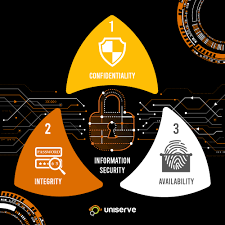